In [1]:
import requests
import re
from urllib import parse
import pandas as pd
import time 
import random
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36",
    "referer": "https://tb.alicdn.com/snapshot/index.html",
    'cookie': 't=884491259d4aed9aac3cd83e5798c433; cna=UU81Fxb46woCAWUv7c0BLoMd; sgcookie=ERElHyZEXq%2FBxbIAKkMLf; tracknick=%5Cu53F6%5Cu95EE%5Cu8C01%5Cu662F%5Cu8FB0%5Cu5357; _cc_=V32FPkk%2Fhw%3D%3D; enc=UvoaKN2E%2F5qKScgssIA7s34lg2c%2B7mFKY6bD58vrwGvLTZKDyYj7UQ0p3hGnXJK11f8JrZT5ky54YNi0i73Few%3D%3D; tfstk=cIOdBdvB3cmha_TF3QHGFR3VyY-dafFd2ys4w4-E6MTnQmN8NsxviIpfnv_Yv13O.; thw=cn; hng=CN%7Czh-CN%7CCNY%7C156; cookie2=1165897f57a1ed424d42db9d3a99ff7d; v=0; _tb_token_=77a6e3fa3eb98; alitrackid=tb.alicdn.com; lastalitrackid=tb.alicdn.com; JSESSIONID=42FB5C5D5D65C270436BAF43224830CB; isg=BPb2H7f2tUx9pkBnqiw8IaAaRyz4FzpR25dtfWDcO1mro5U9yaZ-YfUau3_PPzJp; l=eBTUSTCcQZnRM5Q_BO5alurza77TaQdf1nVzaNbMiInca6TFta8TVNQqOBKvSdtjgt5j2eKrb3kJjRhM8W4LRjkDBeYBRs5mpfpp8e1..',
}

keyword = '零食'
def get_parse(url):
    html = requests.get(url,headers= headers)
    if html.status_code ==200:
        print('页面正常')
        get_html(html)
    else:
        print(html.status_code)

def get_html(html):
    #用正则表达式去获取商品的名称，价格，商家名称和商家位置
    content = html.text
    #定位商品名称
    names = re.compile('"raw_title":"(.*?)"', re.I | re.S)
    name = names.findall(content)
    #定位价格
    prices = re.compile('"view_price":"(.*?)"',re.I|re.S)
    price = prices.findall(content)
    #定位商家名称
    nicks = re.compile('"nick":"(.*?)"',re.I|re.S)
    nick = nicks.findall(content)
    #定位商家位置
    item_locs = re.compile('"item_loc":"(.*?)"', re.I | re.S)
    item_loc= item_locs.findall(content)

    #付款人数
    view_sales = re.compile('"view_sales":"(.*?)"', re.I | re.S)
    view_sale = view_sales.findall(content)
    df = pd.DataFrame()
    #先算出爬出来正则的长度，从而确定循环，把商品的名称，价格，位置全部有序的全部打印出来
    for j in range(len(name)):
        df['店铺名称'] = [nick[j]]
        df['商品名'] = [name[j]]
        df['价格'] = [price[j]]
        df['产地'] = [item_loc[j]]
        df['付款人数'] = [view_sale[j]]
        df.to_csv('零食.csv',mode='a+',header=None,index=None)
    time.sleep(5)
        # print('商品名称：{}\n价格：{}\n商家名称：{}\n商家位置：{}\n'.format(name[j], price[j], nick[j], item_loc[j]))

if __name__ == '__main__':
    df = pd.DataFrame()
    df['店铺名称'] = ['店铺名称']
    df['商品名'] = ['商品名']
    df['价格'] = ['价格']
    df['产地'] = ['产地']
    df['付款人数'] = ['付款人数']
    df.to_csv('零食.csv', mode='a+', header=None, index=None)
    count = 1
    for i in range(0,661,44):
        print('正在爬取第{}页'.format(count))
        url = 'https://s.taobao.com/search?q={}&imgfile=&commend=all&ssid=s5-e&' \
              'search_type=item&sourceId=tb.index&spm=a21bo.2017.201856-taobao-item.1&' \
              'ie=utf8&initiative_id=tbindexz_20170306&bcoffset=1&ntoffset=1&p4ppushleft=2%2C48&s={}'.format(parse.quote(keyword),i)
        get_parse(url)
        count += 1





D:\rgzn\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


正在爬取第1页
页面正常
正在爬取第2页
页面正常
正在爬取第3页
页面正常
正在爬取第4页
页面正常
正在爬取第5页
页面正常
正在爬取第6页
页面正常
正在爬取第7页
页面正常
正在爬取第8页
页面正常
正在爬取第9页
页面正常
正在爬取第10页
页面正常
正在爬取第11页
页面正常
正在爬取第12页
页面正常
正在爬取第13页
页面正常
正在爬取第14页
页面正常
正在爬取第15页
页面正常
正在爬取第16页
页面正常


In [2]:
import pandas as pd
import random
df = pd.read_csv('零食.csv')
df.head()

,店铺名称,商品名,价格,产地,付款人数
0,齐善食品旗舰,齐善素食 素火腿肠零食素肉食品素肠豆制品佛家纯素香肠斋菜,19.8,广东 深圳,2000+人付款
1,贝格美食品专营店,零食超大礼包饼干,64.5,浙江 杭州,1万+人付款
2,周黑鸭食品旗舰店,周黑鸭旗舰店_锁鲜卤鸭脖320g 甜辣味藤椒味武汉特产休闲零食,39.8,湖北 武汉,1000+人付款
3,御食园佳惠专卖店,御食园 冰糖葫芦串装新鲜正宗老北京特产 办公室山楂球袋装小零食,25.8,北京,65人付款
4,天猫国际进口超市,美国进口lindt瑞士莲软心巧克力球50粒喜糖礼物年货零食600g*2,210.0,浙江 杭州,6000+人付款


In [3]:
#删除重复数据
df = df.drop_duplicates()

In [4]:
def qxsj(x):
    x = x.replace("人付款","")
    if '万+' in x:
        return int(int(x[:-2])*random.uniform(1,2)*10000)
    elif '+' in x:
        return int(int(x[:-1])+random.random()*1000)
    else:
        return int(x)
df['付款人数'] = df['付款人数'].apply(qxsj)
df['付款人数']

0       2269
1      19809
2       1599
3         65
4       6917
       ...  
703     5677
704    16315
705     8879
706    19689
707     4712
Name: 付款人数, Length: 676, dtype: int64

In [5]:
#查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 707
Data columns (total 5 columns):
店铺名称    676 non-null object
商品名     676 non-null object
价格      676 non-null float64
产地      676 non-null object
付款人数    676 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 31.7+ KB


In [6]:
#定义机械压缩函数
def yasuo(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st

In [7]:
df["商品名"] = df["商品名"].apply(yasuo)

In [8]:
df['商品名'] = df['商品名'].str.extract(r"([\u4e00-\u9fa5]+)")
df = df.dropna()  #纯表情弹幕直接删除

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\96075\AppData\Local\Temp\jieba.cache
Loading model cost 0.800 seconds.
Prefix dict has been built successfully.


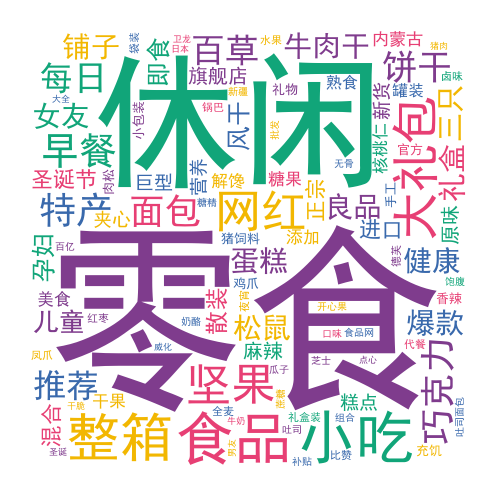

In [9]:
#数据处理库
import numpy as np
import pandas as pd
import glob
import re
import jieba 

#可视化库
import stylecloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from pyecharts.charts import *
from pyecharts import options as opts 
from pyecharts.globals import ThemeType  
from IPython.display import Image 

# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("stopwords_cn.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())            

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

# 绘制词云图
text1 = get_cut_words(content_series=df["商品名"])
stylecloud.gen_stylecloud(text=' '.join(text1), max_words=100,
                          collocations=False,
                          font_path='simhei.ttf',
                          icon_name='fas fa-square',
                          size=500,
                          #palette='matplotlib.Inferno_9',
                          output_name='零食特点.png')
Image(filename='零食特点.png') 

In [12]:
df['产地'] = df['产地'].str.split(" ",expand = True)[0]
df['产地']

0      广东
1      浙江
2      湖北
3      北京
4      浙江
       ..
703    山东
704    安徽
705    广东
706    上海
707    山东
Name: 产地, Length: 676, dtype: object

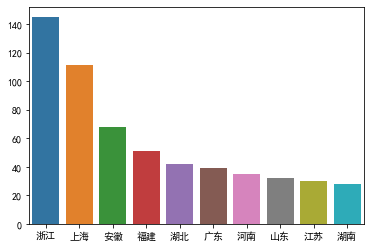

In [14]:
#各省产量分布图
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
data = df['产地'].value_counts()
x_data = [i for i in data.index][0:10]
y_data = [int(i) for i in data.values][0:10]
sns.barplot(x_data,y_data)
plt.show()

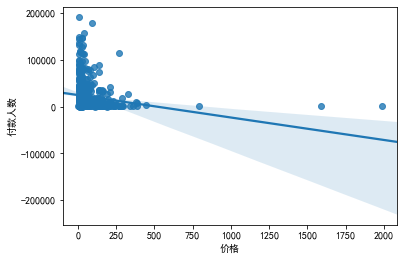

In [15]:
#销量和价格之间的关系
plt.rcParams['axes.unicode_minus']=False
sns.regplot(x='价格',y='付款人数', data=df)
plt.show()

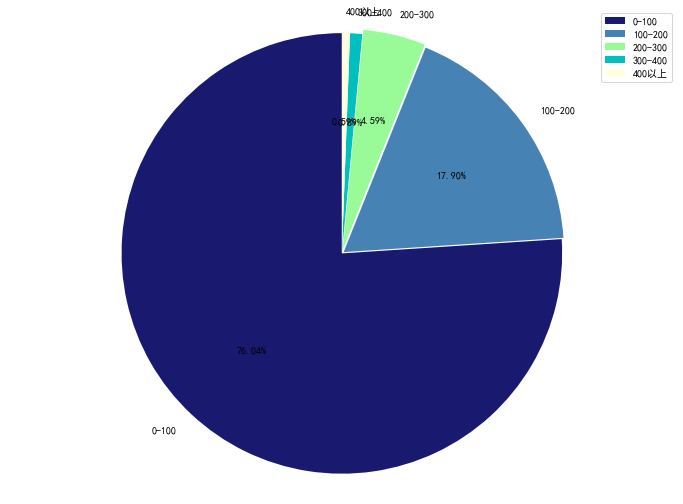

In [18]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in df['价格']:
    if i <= 100:
        count1 +=1
    elif 100 < i <= 200:
        count2 += 1
    elif 200 < i <= 300:
        count3 += 1
    elif 300 < i <= 400:
        count4 += 1
    else:
        count5 += 1
x_data = ['0-100','100-200','200-300','300-400','400以上']
y_data = [count1,count2,count3,count4,count5]

plt.figure(figsize=(12,9)) #调节图形大小
labels = x_data #定义标签
sizes = y_data #每块值
colors = ['midnightblue','steelblue','palegreen','c','lightyellow'] #每块颜色定义
explode = (0,0.01,0.02,0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.1,#图例距圆心半径倍距离
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.legend()
plt.show()